## Binary classification

We make a binary classification using the movie dataset

In [2]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

print(tf. __version__)
print(keras. __version__)

/Users/louissanna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.9.1
2.9.0


In [3]:
# Constants
num_words=10_000

In [4]:
# Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)


In [5]:
x_train.shape


(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
y_train[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [9]:
max([max(sequence) for sequence in x_train])

9999

In [10]:
word_index = keras.datasets.imdb.get_word_index()

In [11]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
words_by_index = {index: word for word, index in word_index.items()}

In [13]:
" ".join([words_by_index.get(index - 3, "?") for index in x_train[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
def vectorise_sequence(sequence, dimensions=num_words):
    result = np.zeros(dimensions, dtype="float32")
    for index in sequence:
        result[index] = 1
    return result


x_train_vectors = np.array([vectorise_sequence(sequence) for sequence in x_train])


In [15]:
x_train_vectors

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_train_vectors = np.array([np.array([float(label)]) for label in y_train])

In [17]:
y_train_vectors

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

## Build model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics="accuracy")
model.build(input_shape=(None,num_words))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x=x_train_vectors,
    y=y_train_vectors,
    validation_split=0.5,
    batch_size=100,
    epochs=10)

Epoch 1/10
125/125 [==============================] - 1s 8ms/step - loss: 0.3748 - accuracy: 0.8343 - val_loss: 0.2817 - val_accuracy: 0.8871
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.1909 - accuracy: 0.9286 - val_loss: 0.2933 - val_accuracy: 0.8868
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.1200 - accuracy: 0.9583 - val_loss: 0.3574 - val_accuracy: 0.8807
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.4579 - val_accuracy: 0.8735
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.6598 - val_accuracy: 0.8607
Epoch 6/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.7155 - val_accuracy: 0.8707
Epoch 7/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 1.1247 - val_accuracy: 0.8448
Epoch 

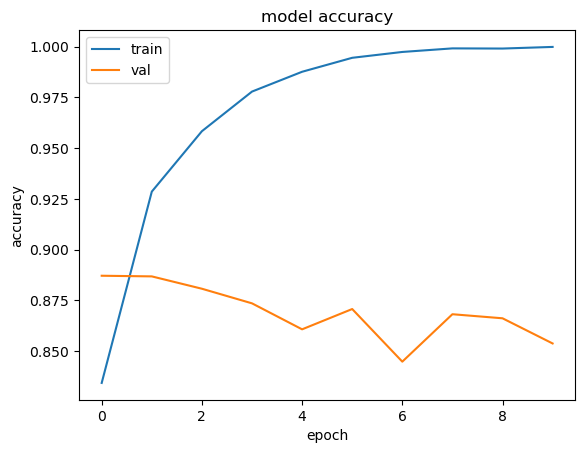

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()